Epoch: 0050 cost= 0.180220574 W= 1.47216 b= 2.53364
Epoch: 0100 cost= 0.083097793 W= 1.32061 b= 3.00429
Epoch: 0050 cost= 0.038315583 W= 1.21771 b= 3.32388
Epoch: 0100 cost= 0.017666943 W= 1.14783 b= 3.54089
Epoch: 0150 cost= 0.008146151 W= 1.10038 b= 3.68824
Epoch: 0200 cost= 0.003756134 W= 1.06816 b= 3.78831
Optimization Finished!
Training cost= 0.00375613 W= 1.06816 b= 3.78831 



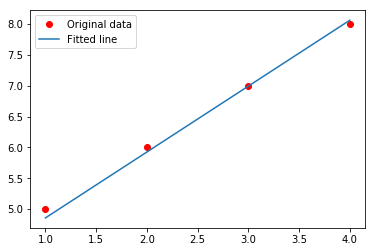

Epoch: 0050 cost= 0.003435522 W= 1.06826 b= 3.797
Epoch: 0100 cost= 0.003185399 W= 1.06606 b= 3.80459
Epoch: 0050 cost= 0.002954854 W= 1.06367 b= 3.8118
Epoch: 0100 cost= 0.002741038 W= 1.06133 b= 3.81874
Epoch: 0150 cost= 0.002542756 W= 1.05907 b= 3.82542
Epoch: 0200 cost= 0.002358791 W= 1.05689 b= 3.83185
Optimization Finished!
Training cost= 0.00235879 W= 1.05689 b= 3.83185 



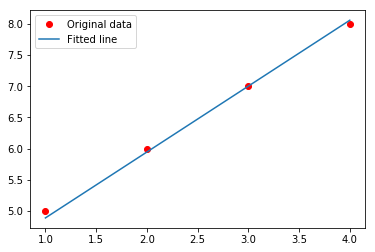

[0.0037561336, 0.0023587914]


In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

rate_list=[0.05,0.005]
epoch_list=[100,200]
j=[]
learning_rate = 0.005
#training_epochs = 1000
display_step = 50

train_X = numpy.asarray([1.,2.,3.,4.])
train_Y = numpy.asarray([5.,6.,7.,8.])
n_samples = train_X.shape[0]

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

pred = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for rate in rate_list:
        optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
        for training_epochs in epoch_list:
            #optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
            for epoch in range(training_epochs):
                for (x, y) in zip(train_X, train_Y):
                    sess.run(optimizer, feed_dict={X: x, Y: y})
                if (epoch+1) % display_step == 0:
                    c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
                    print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))
        print("Optimization Finished!")
        training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
        print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
        j.append(training_cost)
        plt.plot(train_X, train_Y, 'ro', label='Original data')
        plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()
    
print(j)



C:\Users\Vijaylaxmi\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


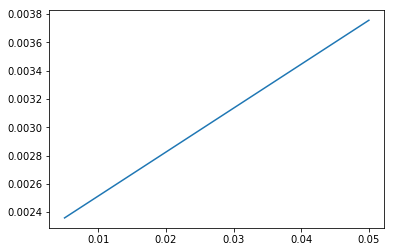

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x_arr=np.array(rate_list)
y_arr=np.array(j)

sess2=tf.Session()
plt.plot(x_arr,y_arr)
plt.legend()
plt.show()